In [1]:
using Plots, Distributions

# include main code
include("../src/functions.jl");

In [2]:
function run_example()
    # definig distribution functions 
    function FR12(u, b1, b2)
        lambda1 = 0.25
        lambda2 = 0.5
        return (-b1 * lambda2 * exp(-u * lambda1 / b1) + b2 * lambda1 * exp(-lambda2 * u / b2) + b1 * lambda2 - b2 * lambda1) / (b1 * lambda2 - b2 * lambda1)
    end

    F1 = SampleDistFun(x -> cdf(Gamma(3, 0.8), x), 40.0, 0.005)
    F2(x) = 1 - exp(-0.7071067812 * sqrt(x))
    FR1(x, a1) = F1(x / a1)
    FR2(x, a2) = F2(x / a2)

    FR(r, x) =
        0.3333333333333333 * FR1(x, r[1]) +
        0.4 * FR2(x, r[2]) +
        0.26666666666666666 * FR12(x, r[1], r[2])


    ER1(a1) = 2.4 * a1
    ER2(a2) = 4 * a2
    ER12(a1, a2) = 4 * a1 + 2 * a2
    ER(r) =
        0.3333333333333333 * ER1(r[1]) +
        0.4 * ER2(r[2]) +
        0.26666666666666666 * ER12(r[1], r[2])


    res = bisection_hjbsolver(
        a=166.0,
        b=333.0,
        max_it=20,
        NRe=2,
        β=5.0 + 6.0 + 4.0,
        FR=FR,
        ER=ER,
        EnoR=ER([1.0, 1.0]),
        partition=(0.0, 19.0, 250.0, 700.0),
        Δx=0.05,
        SearchRanges=([(0.0, 1.0), (0.0, 1.0)], [(0.0, 1.0), (1.0, 1.0)]),
        η=0.25,
        η1=0.3,
        δ=0.15,
        MaxEvals=1500,
        p=120,
        L=300
    )
    return res
end

run (generic function with 1 method)

In [3]:
res = run_example();

(166.0, 249.5, 333.0)
10%, V(70.0) = 1323.2   Time = 46.7 seconds
20%, V(140.0) = 2016.0   Time = 178.0 seconds
30%, V(210.0) = 2822.0   Time = 394.0 seconds
40%, V(280.0) = 3884.6   Time = 552.0 seconds
50%, V(350.0) = 5413.2   Time = 552.0 seconds
60%, V(420.0) = 7775.2   Time = 552.0 seconds
(166.0, 207.75, 249.5)
10%, V(70.0) = 1083.2   Time = 48.3 seconds
20%, V(140.0) = 1573.4   Time = 180.0 seconds
30%, V(210.0) = 2029.6   Time = 381.0 seconds
40%, V(280.0) = 2469.6   Time = 532.0 seconds
50%, V(350.0) = 2887.1   Time = 532.0 seconds
60%, V(420.0) = 3265.9   Time = 533.0 seconds
70%, V(490.0) = 3575.5   Time = 533.0 seconds
80%, V(560.0) = 3761.9   Time = 533.0 seconds
(207.75, 228.625, 249.5)
10%, V(70.0) = 1203.2   Time = 44.6 seconds
20%, V(140.0) = 1794.7   Time = 169.0 seconds
30%, V(210.0) = 2425.8   Time = 374.0 seconds
40%, V(280.0) = 3177.1   Time = 526.0 seconds
50%, V(350.0) = 4150.2   Time = 527.0 seconds
60%, V(420.0) = 5520.6   Time = 527.0 seconds
70%, V(490.0) = 

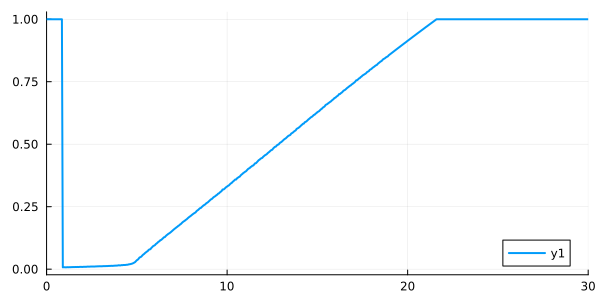

In [4]:
# reinsurance strategy line 1
plot(res[end][1], res[end][4][:, 1], size=(600, 300), xlims=(0, 30), linewidth=2)

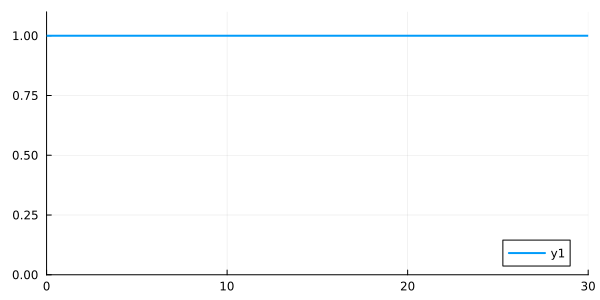

In [5]:
# reinsurance strategy line 2
plot(res[end][1], res[end][4][:, 2], size=(600, 300), xlims=(0, 30), ylims=(0, 1.1), linewidth=2)

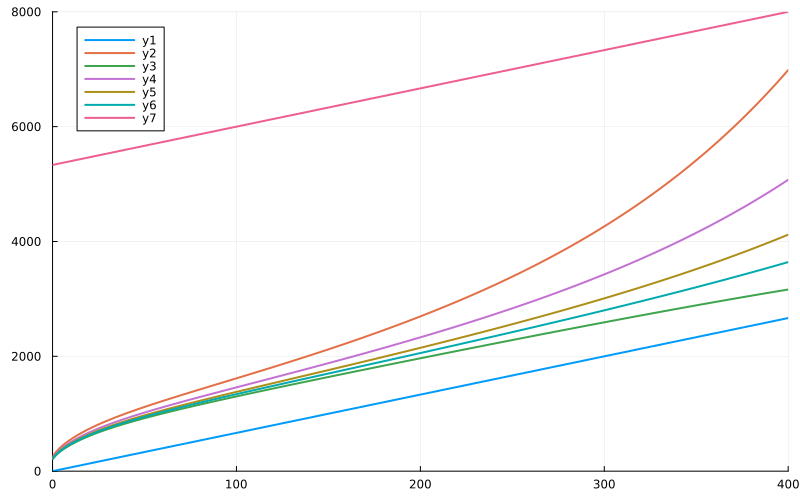

In [21]:
# value function
δ = 0.15
p = 120

plot(x -> x / δ, xlims = (0, 400), linewidth=2, size=(800, 500), ylims=(0,8000))


for i = 1:length(res)
    plot!(res[i][1], res[i][2], linewidth=2)
end
plot!(x -> x / δ + p / δ^2,  linewidth=2)

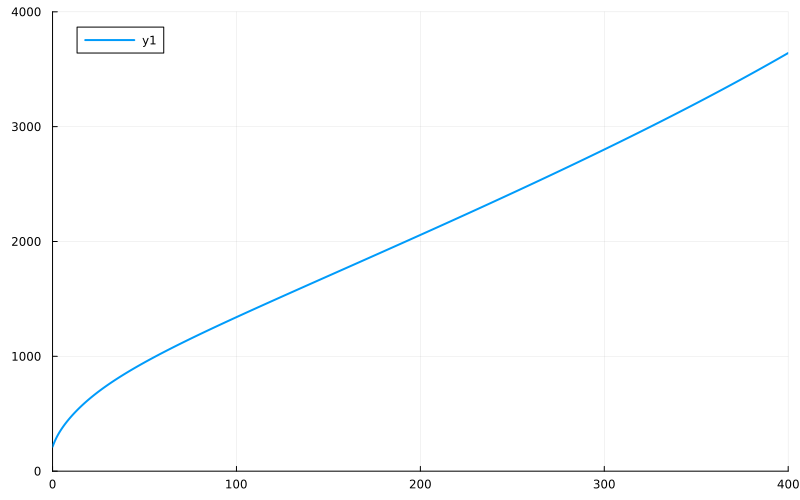

In [18]:
plot(res[end][1], res[end][2], linewidth=2, xlims = (0, 400),ylims = (0, 4000), size=(800, 500))